# **Análisis Exploratorio de Datos del Indice MSCI WORLD**

**0.Extracción Datos AMUNDI MSCI World LU0996182563**

Vamos a extraer los datos de Yahoo Finance.

Su página web es:
es.finance.yahoo.com/

In [ ]:
# Lo primero que hacemos es instalar la librería
!pip install yfinance pandas openpyxl

A continuación en el código debemos indicar como se llama el fondo en Yahoo Finance.

En este caso, el nombre es: 0P00012PP6.F

Además, tenemos que seleccionar las fechas en las que queremos los datos

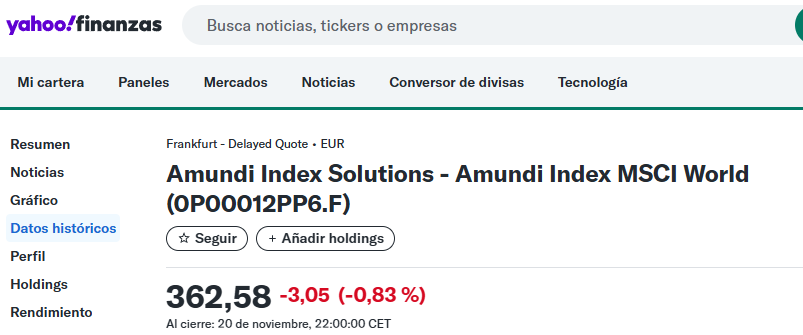

In [ ]:
# guardar como download_yahoo_yfinance.py
import yfinance as yf
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Parámetros
ticker = "0P00012PP6.F"
start = "2015-01-01"   # o usa "YYYY-MM-DD"
end = "2025-11-23"     # la fecha 'end' es excluyente en some libs; ajusta si hace falta
output_xlsx = "/content/drive/MyDrive/Colab Notebooks/Yahoo Finance/0P00012PP6_history.xlsx"

# Descargar histórico
t = yf.Ticker(ticker)
df = t.history(start=start, end=end, interval="1d")  # interval: 1d,1wk,1mo

if df.empty:
    print("Advertencia: el DataFrame devuelto está vacío. Prueba a cambiar fechas o método alternativo.")
else:
    # Guardar a Excel
    df.reset_index(inplace=True)  # pasar Date a columna
    df['Date'] = df['Date'].dt.tz_localize(None) # eliminar información de zona horaria
    df.to_excel(output_xlsx, index=False)
    print(f"Guardado {len(df)} filas en {output_xlsx}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Guardado 899 filas en /content/drive/MyDrive/Colab Notebooks/Yahoo Finance/0P00012PP6_history.xlsx


**1.Carga de datos**

A continuación vamos a hacer una exploración de los datos. Comenzamos haciendo la carga.

In [ ]:
import pandas as pd

# Cargar los datos desde el archivo Excel
df_historical = pd.read_excel(output_xlsx)

# Mostrar las primeras filas del DataFrame cargado
print("Datos históricos cargados:")
print(df_historical.head())

# Mostrar información general del DataFrame
print("\nInformación del DataFrame:")
df_historical.info()

Datos históricos cargados:
        Date        Open        High         Low       Close  Volume  \
0 2022-03-07  243.929993  243.929993  243.929993  243.929993       0   
1 2022-03-09  245.610001  245.610001  245.610001  245.610001       0   
2 2022-03-10  245.559998  245.559998  245.559998  245.559998       0   
3 2022-03-11  244.029999  244.029999  244.029999  244.029999       0   
4 2022-03-14  242.580002  242.580002  242.580002  242.580002       0   

   Dividends  Stock Splits  Capital Gains  
0          0             0              0  
1          0             0              0  
2          0             0              0  
3          0             0              0  
4          0             0              0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           899 non-null    dateti

**2.Limpieza y Preparación**

A continuación, vamos a quedarnos con solo dos columnas: Date y Close.

In [ ]:
df_filtered = df_historical[['Date', 'Close']]

print("DataFrame con las columnas 'Date' y 'Close':")
print(df_filtered.head())

DataFrame con las columnas 'Date' y 'Close':
        Date       Close
0 2022-03-07  243.929993
1 2022-03-09  245.610001
2 2022-03-10  245.559998
3 2022-03-11  244.029999
4 2022-03-14  242.580002


Comprobamos que la columna date tiene el formato date

In [ ]:
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    899 non-null    datetime64[ns]
 1   Close   899 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.2 KB
None


**3.EDA**

**3.1.Obtención de Estadísticos**

A continuación vamos a hacer un analisis exploratorio de los datos. Comenzamos con un resumen numérico básico (media, mediana, desviación estándar, mínimos y máximos) para tener una primera "foto" de los rangos de precios. Tambien indicamos cual es el precio de la fecha más reciente.

In [ ]:
print("\nResumen numérico de los precios de cierre:")
print(df_filtered['Close'].describe())

# Obtener el precio de la fecha más reciente
df_sorted = df_filtered.sort_values(by='Date', ascending=False)
precio_mas_reciente = df_sorted.iloc[0]['Close']
fecha_mas_reciente = df_sorted.iloc[0]['Date'].strftime('%Y-%m-%d')

print(f"\nEl precio de cierre m\u00e1s reciente ({fecha_mas_reciente}) es: {precio_mas_reciente}")


Resumen numérico de los precios de cierre:
count    899.000000
mean     292.347231
std       44.648430
min      224.259995
25%      249.614998
50%      285.279999
75%      334.425003
max      377.390015
Name: Close, dtype: float64

El precio de cierre más reciente (2025-11-20) es: 362.5799865722656


**3.2.Análisis de la Distribución**

Creamos un histograma y un gráfico de densidad de los precios de cierre. Esto nos permitirá ver si los precios se concentran en un rango específico o si tienen una distribución "normal" (campana de Gauss).

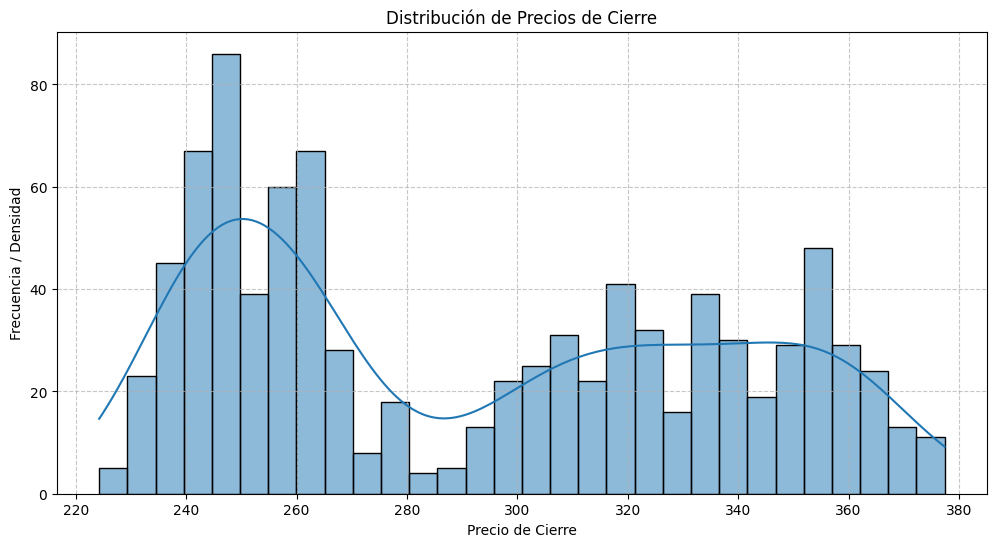

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['Close'], kde=True, bins=30)
plt.title('Distribución de Precios de Cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia / Densidad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Hemos obtenido la siguiente imagen: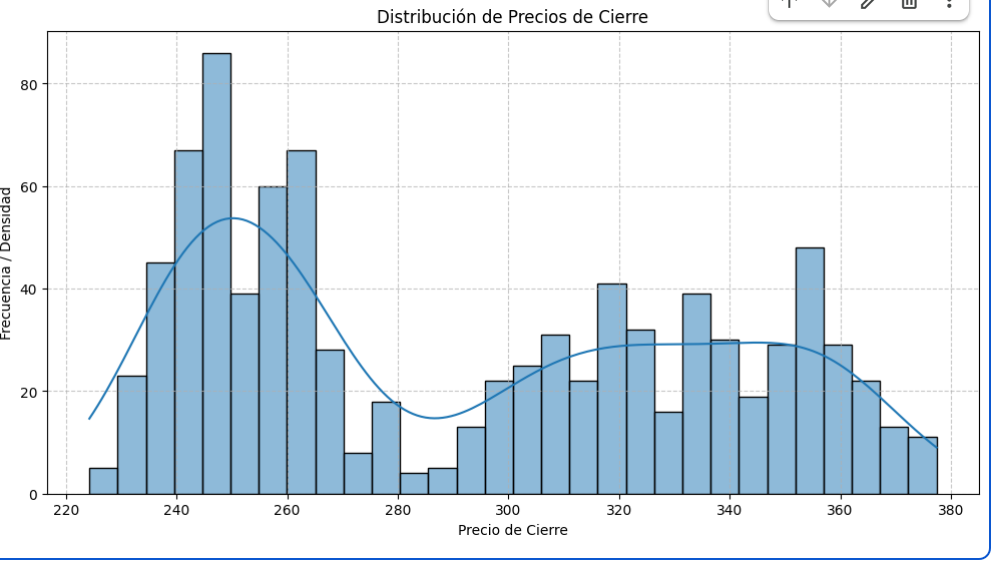

La interpretación de la imagen es la siguiente:

**1. ¿Es una distribución "Normal" (Campana de Gauss)?**

Definitivamente NO. Una distribución normal tendría una forma de campana perfecta, simétrica y con un solo pico en el centro.

**2. ¿Qué forma tiene y qué significa?**

La gráfica es Bimodal (tiene dos "jorobas" o picos claros). Esto es muy común en mercados financieros y cuenta una historia de dos "regímenes" o comportamientos distintos del precio:

*   **Pico 1 (Zona Baja ~260 - 280):** Esta fue una zona de "confort" o acumulación para el precio. Hubo una cantidad significativa de días en los que el fondo cotizó en este rango más bajo. Podría corresponder a un periodo de corrección o incertidumbre en el mercado.

*   **Pico 2 (Zona Alta ~295 - 310):** Este es el pico dominante y más alto. Indica que, con mayor frecuencia, el precio se ha mantenido en este nivel superior. Esto sugiere que el mercado ha aceptado esta valoración más alta como el "nuevo normal".

*   **El Valle Intermedio (~285 - 290):** Hay una zona con menos frecuencia entre los dos picos. Esto significa que el precio pasó relativamente rápido por esta zona, usándola como transición de la zona baja a la zona alta.

*   **Conclusión:** Esta distribución es positiva (alcista). Muestra que el fondo no solo ha tocado precios altos, sino que ha pasado la mayor parte del tiempo en la zona alta de precios (el pico derecho). La distribución está "sesgada" hacia la derecha (precios más altos). Esto indica una tendencia de fondo fuerte donde los precios bajos son menos frecuentes que los precios altos.

*   **Interpretación:** El activo ha demostrado fortaleza, estableciéndose cómodamente en niveles de precios superiores tras haber superado una zona inferior.

En resumen, la subida de precio no fue suerte de un día. El fondo ha demostrado que es capaz de mantener su valor en precios altos de forma estable. No "tiene vértigo"

**3.3.Detección de Valores Atípicos (Outliers)**

Generamos un diagrama de caja (boxplot). Es la forma más rápida de visualizar si existen precios extremos o anomalías fuera de lo común en el histórico.

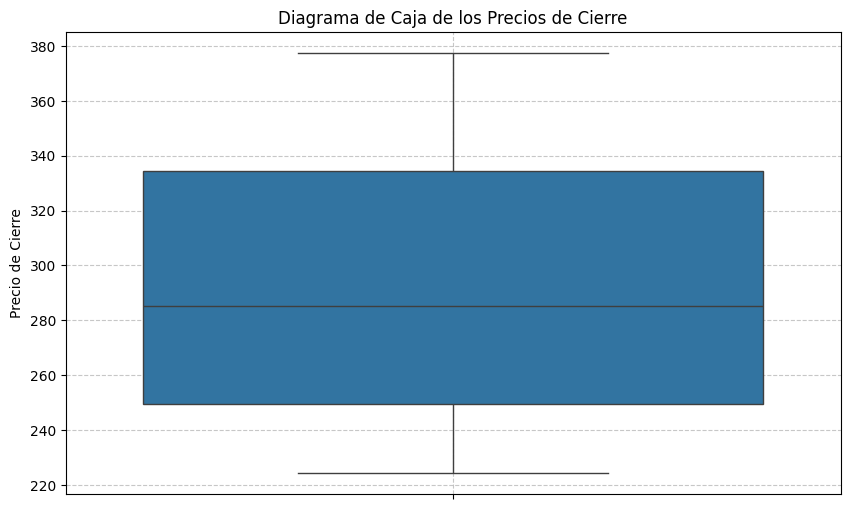

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_filtered['Close'])
plt.title('Diagrama de Caja de los Precios de Cierre')
plt.ylabel('Precio de Cierre')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**3.4.Análisis de Tendencia (Suavizado)**

Calculamos y visualizamos medias móviles (por ejemplo, de 30 días) sobre la gráfica de precios. Esto ayuda a distinguir la tendencia real del "ruido" diario del mercado.

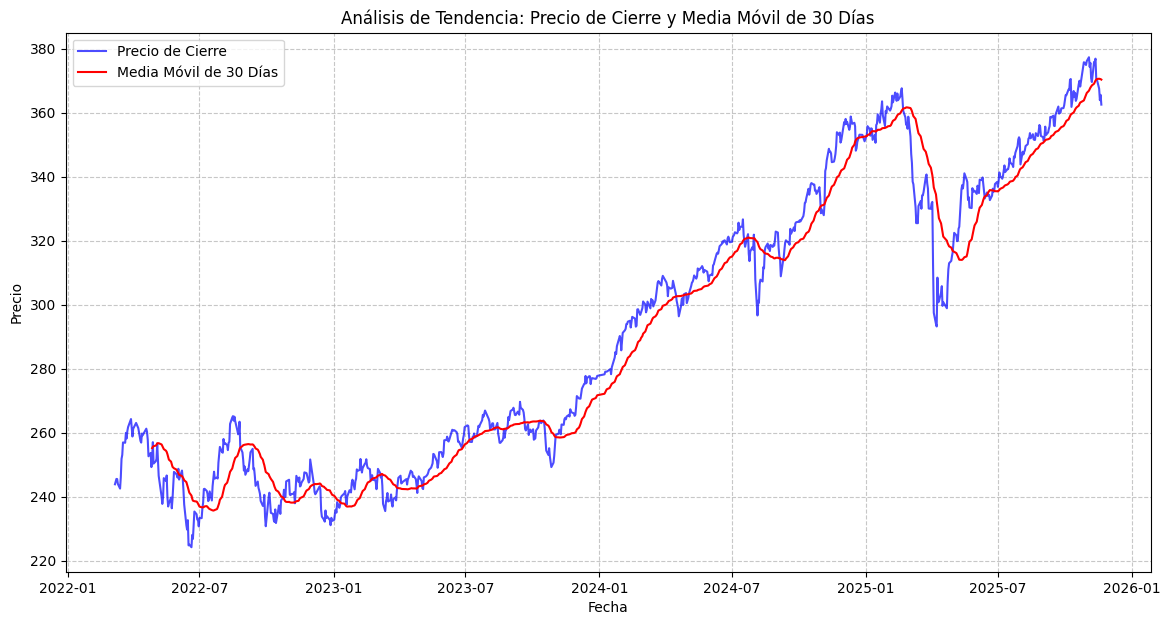

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que 'Date' sea el índice para el gráfico de series temporales
df_filtered_indexed = df_filtered.set_index('Date')

# Calcular la media móvil de 30 días
df_filtered_indexed['SMA_30'] = df_filtered_indexed['Close'].rolling(window=30).mean()

# Visualizar la tendencia
plt.figure(figsize=(14, 7))
plt.plot(df_filtered_indexed['Close'], label='Precio de Cierre', color='blue', alpha=0.7)
plt.plot(df_filtered_indexed['SMA_30'], label='Media Móvil de 30 Días', color='red')
plt.title('Análisis de Tendencia: Precio de Cierre y Media Móvil de 30 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Interpretación de los resultados
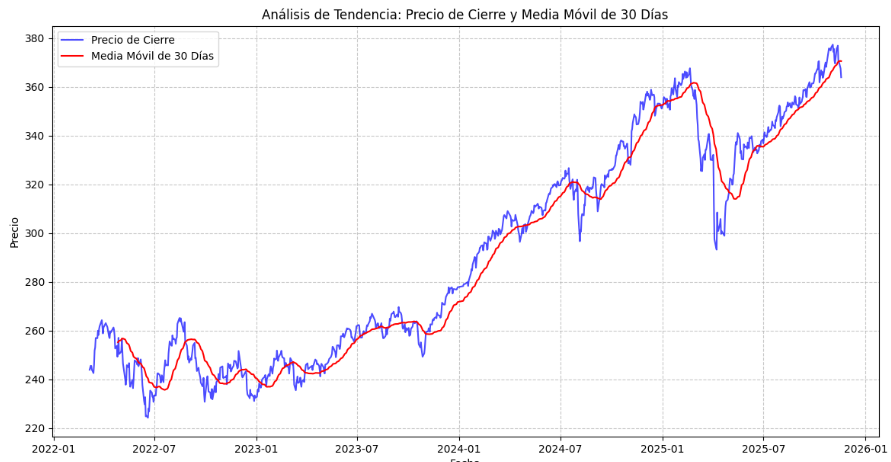

**Interpretación del Análisis de Tendencia:**

*   **Línea Azul (Precio de Cierre):** Esta línea muestra la fluctuación diaria del precio del fondo. Como se puede ver, hay mucho 'ruido' o variaciones a corto plazo.

*   **Línea Roja (Media Móvil de 30 Días - SMA_30):** Esta línea suaviza las fluctuaciones del precio de cierre. Representa el precio promedio del fondo durante los últimos 30 días. Su función principal es ayudarnos a identificar la dirección de la tendencia a medio plazo, eliminando el impacto de los movimientos diarios erráticos.

**Observaciones Clave:**

*   **Tendencia General:** Al observar la línea roja, se puede apreciar una clara tendencia alcista en el periodo cubierto por los datos, especialmente desde el inicio del historial disponible. A pesar de las caídas puntuales del precio de cierre (línea azul), la SMA_30 continúa moviéndose al alza, confirmando esta tendencia positiva.

*   **Soporte/Resistencia:** Cuando el precio de cierre (línea azul) se mantiene por encima de la SMA_30, sugiere una tendencia alcista saludable. Si el precio cae por debajo de la SMA_30 y luego rebota, la media móvil actúa como un nivel de soporte. Si el precio sube y luego retrocede desde la SMA_30, podría actuar como resistencia. En el gráfico, la línea roja parece haber actuado como un soporte dinámico en varias ocasiones.


En resumen, este gráfico refuerza la idea de una evolución favorable del fondo, con una tendencia alcista sostenida que el filtro de la media móvil hace más evidente.

**3.5.Análisis de Autocorrelación (Lag Plot):**

Realizamos un gráfico de dispersión comparando el precio de hoy contra el precio de ayer (lag 1). Esto sirve para verificar si el precio pasado tiene una relación lineal fuerte con el precio futuro inmediato.

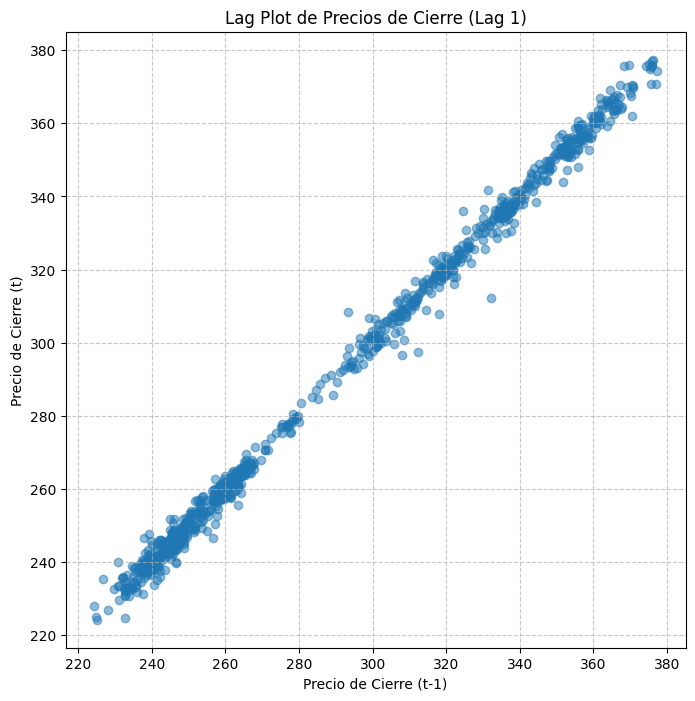


Coeficiente de correlación entre el precio de hoy y el de ayer: 0.9981


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una columna con el precio del día anterior (lag 1)
df_filtered_indexed['Close_Lag1'] = df_filtered_indexed['Close'].shift(1)

# Generar el Lag Plot
plt.figure(figsize=(8, 8))
plt.scatter(df_filtered_indexed['Close_Lag1'], df_filtered_indexed['Close'], alpha=0.5)
plt.title('Lag Plot de Precios de Cierre (Lag 1)')
plt.xlabel('Precio de Cierre (t-1)')
plt.ylabel('Precio de Cierre (t)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Opcional: Calcular la correlación lineal
correlation = df_filtered_indexed['Close'].corr(df_filtered_indexed['Close_Lag1'])
print(f"\nCoeficiente de correlaci\u00F3n entre el precio de hoy y el de ayer: {correlation:.4f}")

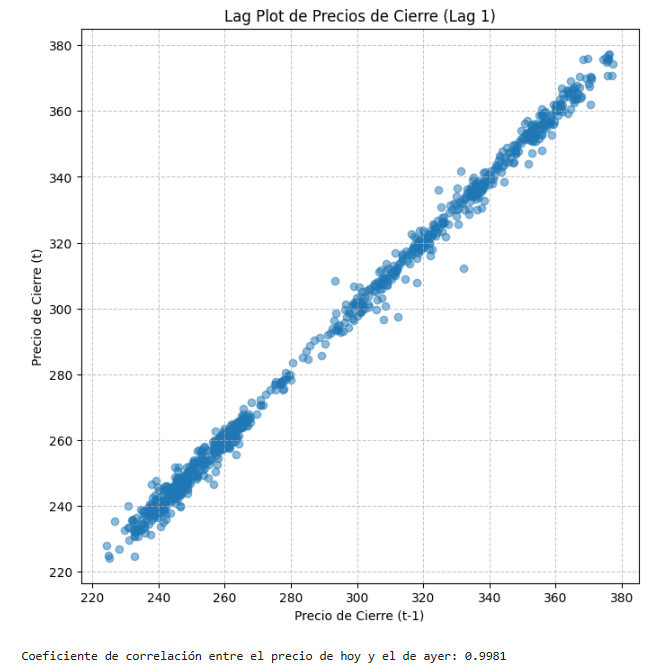

**Interpretación del Lag Plot (Gráfico de Dispersión):**

Al observar el gráfico, se puede ver una línea de puntos muy agrupados y extendiéndose en diagonal desde la esquina inferior izquierda hasta la superior derecha. Esto indica una relación lineal muy fuerte y positiva entre el precio de cierre de un día (Precio de Cierre (t-1)) y el precio de cierre del día siguiente (Precio de Cierre (t)).

**Coeficiente de Correlación:**

El coeficiente de correlación calculado es 0,9981. Este valor está muy cerca de 1, lo que confirma lo que hay una autocorrelación extremadamente alta. En términos sencillos, el precio de cierre de hoy está muy fuertemente relacionado con el precio de cierre de ayer.

Esto es típico en series de tiempo financieras, donde los precios no cambian drásticamente de un día para otro y suelen seguir una trayectoria. Un valor alto sugiere que si el precio subió ayer, es probable que suba hoy (o se mantenga), y viceversa.

En resumen, existe una fuerte persistencia en los precios. El conocimiento del precio de cierre de ayer es un excelente predictor del precio de cierre de hoy. Esto es una buena base para modelos predictivos, aunque es importante recordar que la correlación no implica causalidad y siempre hay que considerar otros factores.

**4. Gráficas de descomposición (Tendencia, Estacionalidad, Residuo)**

1. Convertimos la columna 'Date' en el índice del DataFrame.

2. Establecemos la frecuencia del índice a días hábiles ('B') y rellenamos los huecos (festivos/fines de semana) usando 'ffill' para evitar errores de nulos.

3. Utilizamos seasonal_decompose de la librería statsmodels sobre la columna 'Close' con un periodo de 252 (anual).

4. Mostramos los 4 gráficos resultantes (Observado, Tendencia, Estacionalidad, Residuo) en una figura de tamaño grande."


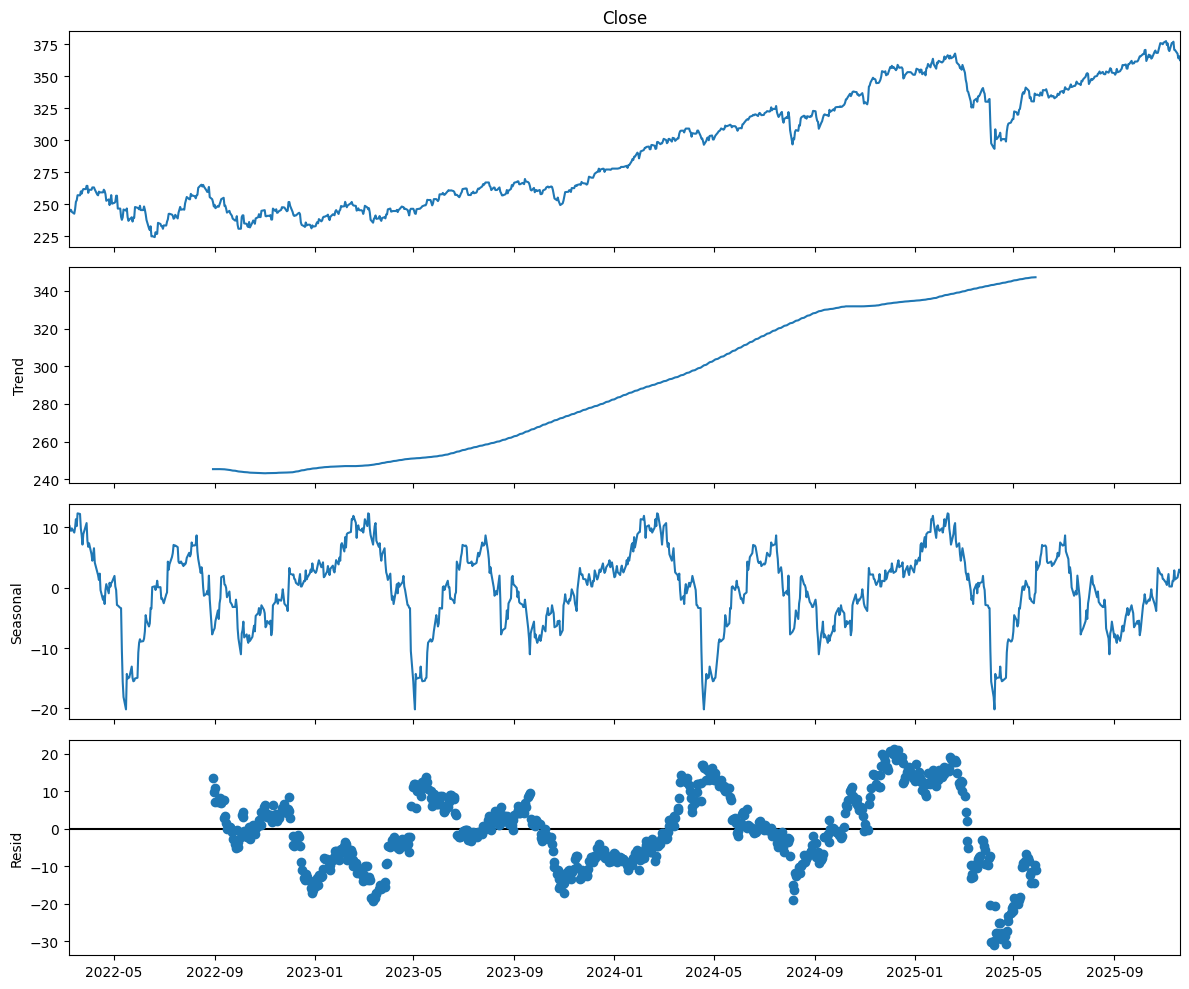

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- PASO 1: Preparar los datos ---
# Aseguramos que la fecha sea el índice (si no lo has hecho ya)
# Cambia 'df' por el nombre de tu variable si es distinto
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Seleccionamos solo la columna 'Close'
# .asfreq('B') fija la frecuencia a "Días Hábiles" (Business days)
# .ffill() rellena los festivos con el precio del día anterior para evitar huecos vacíos
serie_temporal = df['Close'].asfreq('B').ffill()

# --- PASO 2: Análisis de Descomposición ---
# period=252 indica que buscamos patrones anuales (hay ~252 días de bolsa al año)
resultado = seasonal_decompose(serie_temporal, model='additive', period=252)

# --- PASO 3: Graficar ---
plt.rcParams['figure.figsize'] = (12, 10)  # Hacemos la figura grande
resultado.plot()
plt.show()

**Interpretación de los datos**
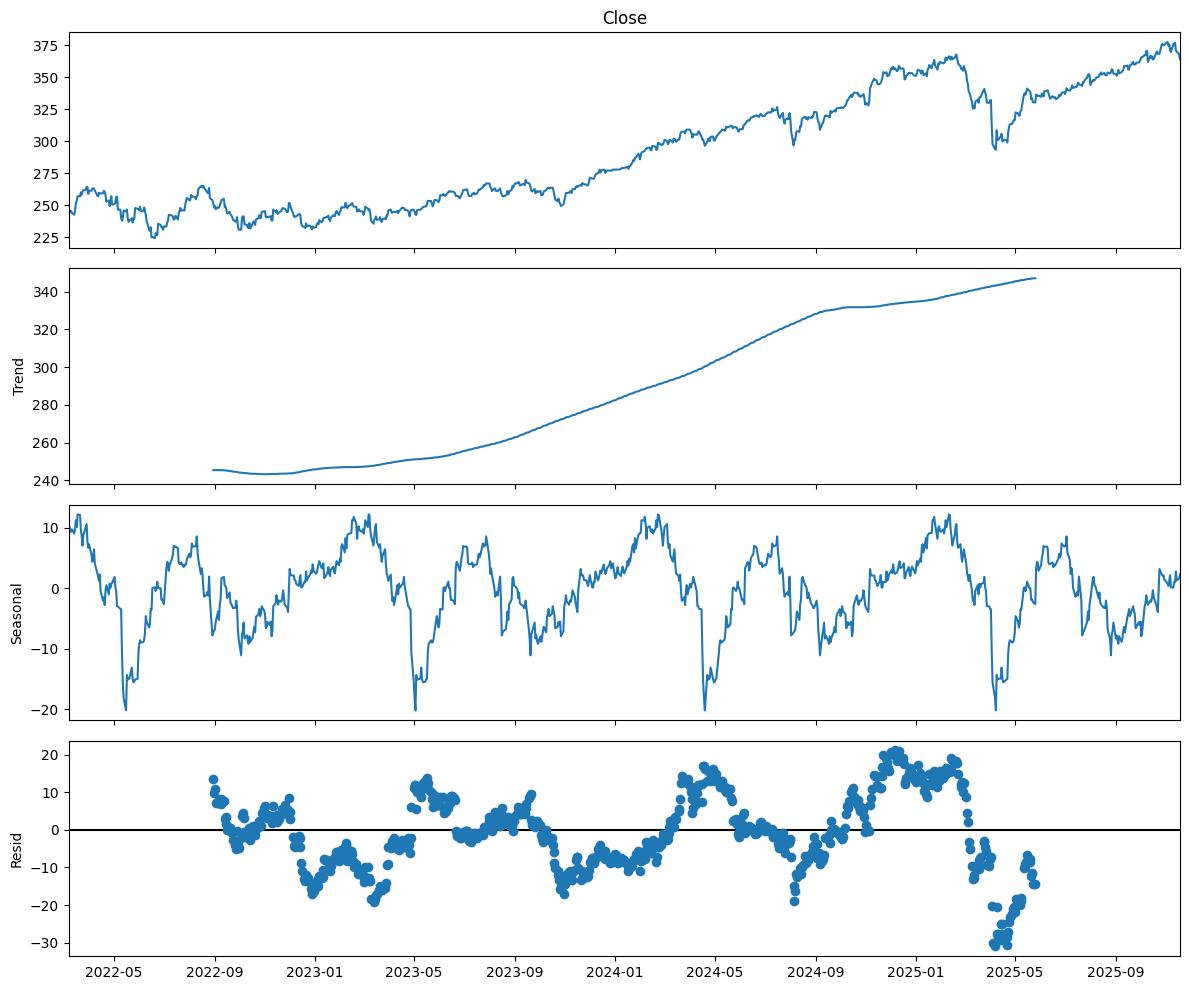



**1. Close (El Precio Real):**
 Vemos un activo con volatilidad. Hubo una caída notable durante la segunda mitad de 2022 (mercado bajista), un periodo de consolidación a principios de 2023, y una recuperación fuerte y sostenida hacia finales de 2023, 2024 y entrando en 2025.


**2. Trend (La Tendencia de Fondo):**
Esta línea suaviza la curva de precios eliminando el ruido diario y los efectos estacionales.

Se pueden ver las siguientes zonas:

*   **Cambio de ciclo:** Se observa claramente cómo la tendencia dejó de ser bajista/plana alrededor de principios de 2023.

*   **Fuerte impulso alcista:** Desde mediados de 2023 hasta el final de la gráfica, la pendiente es positiva y constante. Esto confirma que, estructuralmente, el mercado está en una fase de crecimiento (bull market), independientemente de las caídas de corto plazo que puedan asustar a los inversores.
# Nueva sección
*   **Suavización final:** Hacia la parte más derecha (futuro cercano o datos más recientes de 2025), la curva parece aplanarse ligeramente, lo que podría sugerir una pérdida de "momentum" o inercia alcista, aunque la dirección sigue siendo positiva.

**3. Seasonal (Estacionalidad):** Muestra los patrones que se repiten cíclicamente cada año. El eje vertical va de aprox. -20 a +10. El MSCI World parece tener un ciclo anual muy marcado en esta descomposición.

Se pueden ver las siguientes zonas:

*   **Puntos Bajos (Valles):** Se observan caídas profundas y agudas de forma repetida. Si miramos las fechas (fíjate en las marcas de 2022-09, 2023-09, etc.), estos valles coinciden a menudo con el tercer trimestre (septiembre/octubre). Esto se alinea con el famoso adagio bursátil "September effect", donde las bolsas suelen tener peor rendimiento histórico en esos meses.

*   **Recuperación:** Tras esos valles profundos, suele venir un rebote rápido (rally de fin de año o principio de año).

**4. Resid (Residuos o "Ruido"):**
Esto es lo que queda después de restar la tendencia y la estacionalidad al precio original. Teóricamente, debería ser "ruido blanco". Aquí los puntos no están dispersos uniformemente. Hay "clusters" o agrupaciones.

A finales de 2022/principios de 2023 hay un grupo de residuos negativos (el modelo esperaba precios más altos de los que hubo).

En 2024 hay un grupo de residuos positivos (el precio subió más de lo que la tendencia y estacionalidad predecían, quizás por el boom de la Inteligencia Artificial).

Al final de la gráfica (derecha), los residuos caen bruscamente por debajo de cero. Esto indica un evento negativo inesperado o una corrección brusca que no es ni estacional ni parte de la tendencia suave. El precio cayó mucho más de lo que el modelo "normal" predecía.


# **Conclusión para el Inversor**

El MSCI World se encuentra en una tendencia de fondo alcista (Trend) muy clara. Sin embargo, la gráfica de Estacionalidad advierte que hay momentos del año (típicamente otoño) donde las correcciones son sistémicas.

Sin embargo, la gráfica de Residuos muestra una anomalía negativa fuerte al final del periodo. Esto sugiere que el mercado ha sufrido recientemente un shock o volatilidad que se sale de la norma, lo cual podría ser una oportunidad de compra (si confías en la tendencia) o una señal de precaución (si crees que la tendencia va a cambiar).